**PREDICT FUEL EFFICIENCY USING TENSORFLOW IN PYTHON**



***INTRODUCTION***

In today's automotive landscape, fuel efficiency has become a paramount concern for both manufacturers and consumers alike. With the increasing emphasis on environmental sustainability and rising fuel costs, the ability to accurately predict a vehicle's fuel efficiency is of utmost importance.

In this project, we delve into the realm of machine learning with TensorFlow to develop a robust model for predicting fuel efficiency. Leveraging the power of TensorFlow's API, we'll explore how to analyze a dataset containing crucial features such as distance traveled, engine specifications, and other relevant factors. Through this journey, we aim to unlock insights that not only enhance our understanding of fuel efficiency dynamics but also empower us to build predictive models that drive efficiency and innovation in the automotive industry. Join us as we embark on this fascinating exploration at the intersection of data science and automotive engineering.

***IMPORT LIBRARIES***

In [4]:
import warnings
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 

import tensorflow as tf 
from tensorflow import keras 
from keras import layers 


In [2]:
#Load data from local computer
df = pd.read_csv('/users/macbook/downloads/auto-mpg.csv') 
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [5]:
#shape of the data
df.shape


(406, 9)

In [6]:
#datatypes of the column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    int64  
 7   origin        406 non-null    int64  
 8   car name      406 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.7+ KB


In [7]:
df.describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


***EXPLORATORY DATA ANALYSIS***


As per the df.info() part first, fix w the horsepower column inorder to continue with the analysis.


In [9]:
df['horsepower'].unique()


array([130., 165., 150., 140., 198., 220., 215., 225., 190., 115., 153.,
       175., 170., 160.,  95.,  97.,  85.,  88.,  46.,  87.,  90., 113.,
       200., 210., 193.,  nan,  48., 100., 105., 180., 110.,  72.,  86.,
        70.,  76.,  65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92.,
       145., 137., 158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,
        67.,  83.,  78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98.,
        53.,  81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,
        63.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

It is observed that instead of the null they have been replaced by the string ‘nan’ due to this, it is necessary to handle the missing values approprietly.

In [8]:

import numpy as np

print(df.shape)
df = df[~np.isnan(df['horsepower'])]
print(df.shape)



(406, 9)
(400, 9)


In [10]:
df['mpg'].unique()

array([18. , 15. , 16. , 17. , 14. ,  nan, 24. , 22. , 21. , 27. , 26. ,
       25. , 10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. ,
       35. , 20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5,
       29.5, 26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1,
       36.1, 32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6,
       18.1, 17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6,
       16.2, 19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4,
       34.2, 34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2,
       26.4, 24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8,
       44.3, 43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6,
       25.8, 23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7,
       32.9, 31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

It is observed that instead of the null they have been replaced by the string ‘nan’ due to this we have to handle the missing values approprietly.

In [9]:
import numpy as np

print(df.shape)
df = df[~np.isnan(df['mpg'])]
print(df.shape)


(400, 9)
(392, 9)


In [12]:
df.nunique()

mpg              36
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model year       13
origin            3
car name        301
dtype: int64

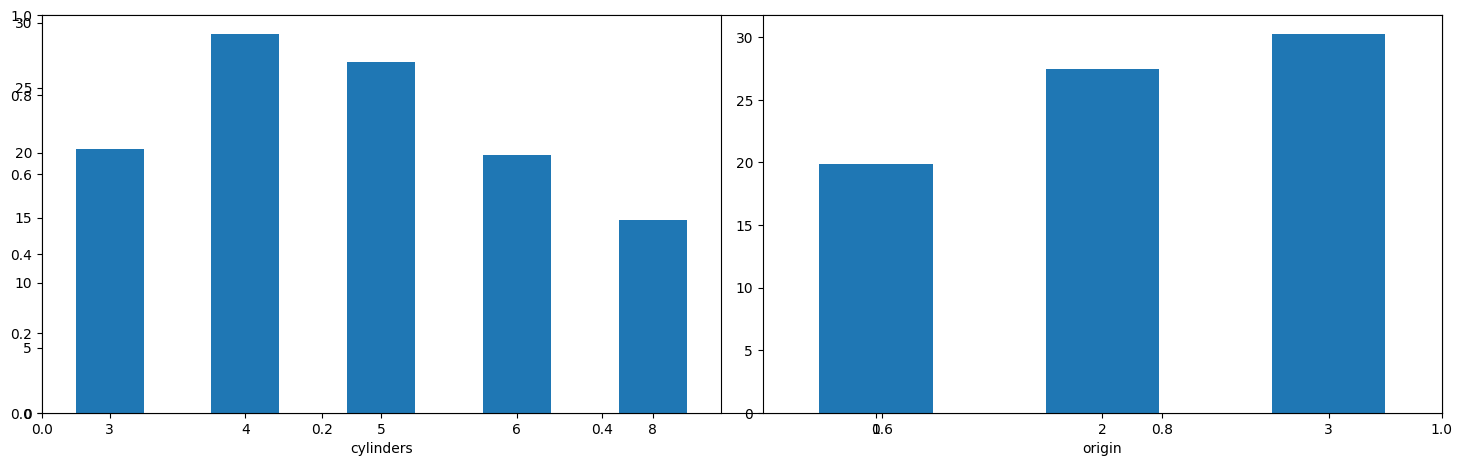

In [30]:

df_cleaned = df.dropna(subset=['mpg'])

plt.subplots(figsize=(15, 5))
for i, col in enumerate(['cylinders', 'origin']):
    plt.subplot(1, 2, i+1)
    x = df_cleaned.groupby(col)['mpg'].mean()  # Calculating mean directly
    x.plot.bar()
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Here we can observe that the mpg values are highest for the origin 3.

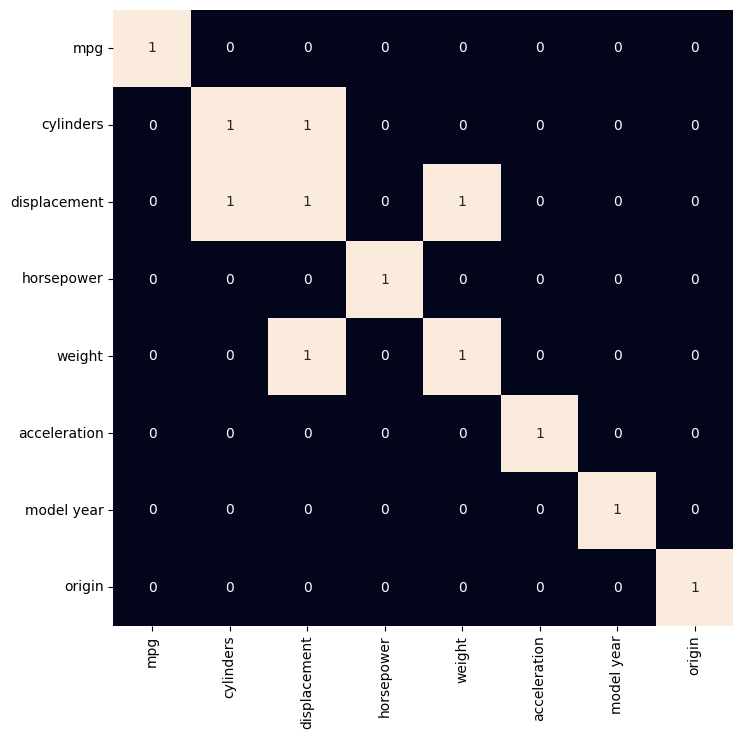

In [31]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(8, 8))
sb.heatmap(numeric_df.corr() > 0.9,
           annot=True,
           cbar=False)
plt.show()


If we will remove the displacement feature then the problem of high collinearity will be removed.

In [32]:
df.drop('displacement', 
        axis=1, 
        inplace=True)

***DATA INPUT PIPELINE***

In [36]:
from sklearn.model_selection import train_test_split 
features = df.drop(['mpg', 'car name'], axis=1) 
target = df['mpg'].values 

X_train, X_val, \
	Y_train, Y_val = train_test_split(features, target, 
									test_size=0.2, 
									random_state=22) 
X_train.shape, X_val.shape 



((313, 6), (79, 6))

In [37]:
AUTO = tf.data.experimental.AUTOTUNE 

train_ds = ( 
	tf.data.Dataset 
	.from_tensor_slices((X_train, Y_train)) 
	.batch(32) 
	.prefetch(AUTO) 
) 

val_ds = ( 
	tf.data.Dataset 
	.from_tensor_slices((X_val, Y_val)) 
	.batch(32) 
	.prefetch(AUTO) 
) 


***Model Architecture***

The implementation involves a model using the Sequential API of Keras, comprising the following components:

- Two fully connected layers.
- Inclusion of BatchNormalization layers to ensure stable and rapid training, and a Dropout layer before the final layer to prevent overfitting.
- The final layer serves as the output layer.

In [38]:
model = keras.Sequential([ 
	layers.Dense(256, activation='relu', input_shape=[6]), 
	layers.BatchNormalization(), 
	layers.Dense(256, activation='relu'), 
	layers.Dropout(0.3), 
	layers.BatchNormalization(), 
	layers.Dense(1, activation='relu') 
]) 

While compiling a model, three essential parameters are provided:

- optimizer: The method used to optimize the cost function through gradient descent.
- loss: The function used to monitor the model's improvement during training.
- metrics: A tool for evaluating the model's performance by predicting both training and validation data.

In [39]:
model.compile( 
    loss='mae', 
    optimizer='adam', 
    metrics=['mape']
) 

summary of the model’s architecture:

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,889 (273.00 KB)

 Trainable params: 68,865 (269.00 KB)

 Non-trainable params: 1,024 (4.00 KB)

****Model Training****

Now train the model using the training and validation pipeline.

In [41]:

history = model.fit(train_ds, 
					epochs=30, 
					validation_data=val_ds) 


Epoch 1/30


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 21.0192 - mape: 91.4968 - val_loss: 22.2658 - val_mape: 100.0000
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.6667 - mape: 79.9326 - val_loss: 22.2658 - val_mape: 100.0000
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.2940 - mape: 75.2255 - val_loss: 22.2658 - val_mape: 100.0000
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.0791 - mape: 71.0113 - val_loss: 22.2658 - val_mape: 100.0000
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.9111 - mape: 66.8584 - val_loss: 22.2658 - val_mape: 100.0000
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.7485 - mape: 62.5986 - val_loss: 22.2658 - val_mape: 100.0000
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.7934 - mape: 59.2177 - val_loss: 22.2658 - val_mape: 100.0000
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.2080 - mape: 56.8986 - val_loss: 22.2658 - val_mape: 100.0000
Epoch 9/30
10/10 ━━━━━━━━━

In [42]:
history_df = pd.DataFrame(history.history) 
history_df.head() 


,loss,mape,val_loss,val_mape
0,20.029593,87.941147,22.265823,100.0
1,17.388779,78.736885,22.265823,100.0
2,16.116402,74.299095,22.265823,100.0
3,14.897974,70.016975,22.265823,100.0
4,13.747181,65.863365,22.265823,100.0


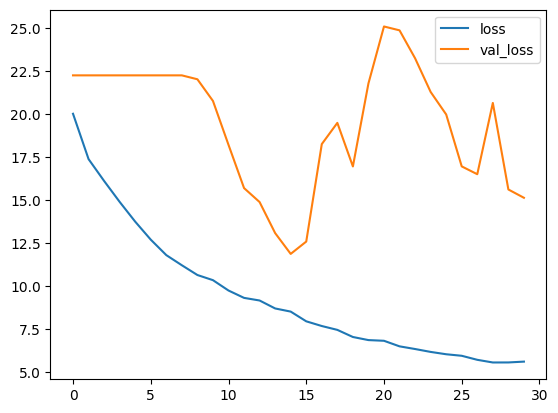

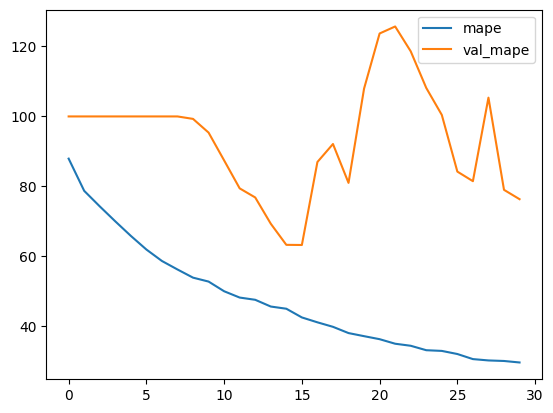

In [44]:
history_df.loc[:, ['loss', 'val_loss']].plot() 
history_df.loc[:, ['mape', 'val_mape']].plot() 
plt.show() 


The training error has worked but the case with the validation is somewhat different.